# **Principi prezentacije i prepoznavanja oblika 2024/2025**
IT 48/2021 Đorđe Vuković

**Tema projektnog zadatka:** Klasifikacija slika listova

# **Sadržaj**



1.   **Uvod**
2.   **Teorijski dio**
3.   **Kratak vodič kroz praktični rad**
4.   **Analiza dataseta**
5.   **Odabir tehnologija**
6.   **Praktični dio**
7.   **Zaključak**
8.   **Literatura**


---
# **1. Uvod**

Klasifikacija je ključna oblast mašinskog učenja koja se bavi automatskim prepoznavanjem i kategorizacijom objekata na digitalnim slikama. Ova tehnologija predstavlja osnovu za brojne praktične sisteme, kao što su medicinska dijagnostika, biološka klasifikacija, kontrola kvaliteta u industriji, autonomna vozila, i organizacija fotografija na društvenim mrežama.

Poseban izazov u klasifikaciji slika predstavlja rad sa malim datasetovima, što je čest slučaj domenima kao što su biologija, medicina i ekologija, gdje je skupljanje velikog broja podataka skupo ili vremenski zahtjevno. Tradicionalni pristupi, poput treniranja dubokih neuronskih mreža od nule, zahtjevaju desetine hiljada slika po klasi kako bi postigli zadovoljavajuće rezultate. Međutim, takva količina često nije dostupna.

Tokom poslednjih 10 godina, **Transfer Learning** se pokazao kao revolucionarno rješenje za ovaj problem. Transfer Learning omogućava korišćenje modela koji su prethodno trenirani na velikim datasetovima (kao što je  ImageNet sa 1.4 miliona slika) i njihovu adaptaciju za specifične zadatke sa znatno manjim brojem podataka.

U ovom projektu obrađuje se dataset sa slikama silueta listova različitih vrsta drveća, sa ciljem da se kroz praktičan rad prikaže primjena Transfer Learning tehnike i uporedi sa klasičnim pristupima klasifikacije. Dataset sadrži ekstreman nedostatak podataka - samo 10 slika po klasi, što  čini ovaj problem idealnim testom za pokazivanje kvaliteta Transfer Learning-a


---







# **2. Teorijski dio**
**2.1. Klasifikacija slika**
Klasifikacija slika je zadatak u kojem računar trea da dodjeli jednu ili više labela(kategorija) ulaznoj slici. Na primjer, na slici lista, sistem treba da prepozna da li je u pitanju hrast, javor, breza ili neka druga vrsta drveta.

Moderne metode klasifikacije slika zasnivaju se na dubokim konvolucionim neuronskim mrežama (CNN), koje su inspirisane načinom na koji ljudski vizuelni korteks procesira informacije. CNN se sastoji od više slojeva koji postupno izdvajaju složenije karakteristike iz slike:


*   **Rani slojevi:** Detektuju jednostavne karakteristike kao što su ivice, linije i uglovi
*   **Srednji slojevi:** Kombinuju jednostavne karakteristike u složenije strukture kao što su teksture i djelovi objekata
*   **Kasni slojevi:** Kombinuju složene strukture u prepoznatljive objekte

**2.2. Problem malog dataseta**

Treniranje CNN-a od nule zahtjeva:


*   **Veliku količinu podataka:** Tipično 10,000+ slika po klasi
*   **Dugo vrijeme treniranja:** Dani ili nedelje

U realnim scenarijima, posebno u biološkim i medicinskim domenima, često imamo:


*   **Mali broj slika:** 10-100 po klasi
*   **Ograničene resurse:** Standardni računari
*   **Vremensko ograničenje:** Hitno potrebni rezultati

Kada pokušamo trenirati CNN od nule sa malim datasetom, dolazi do **overfittinga** tj. model napamet nauči trening podatke ali ne uspijeva da generalizuje na nove, neviđene slike.

**2.3. Transfer Learning - Rješenje**

Transfer Learning je tehnika u kojoj se znanje naučeno tokom rješavanja jednog problema primjenjuje na drugi, povezan problem. U kontekstu klasifikacije slika, to znači:



1.   **Korišćenje modela pretreniranog na velikom datasetu**
2.   **Zamrzavanje naučenih težina** kako se nebi izgubile opšte vizuelne karakteristike
3.   **Dodavanje novih slojeva** specifičnih za konkretan problem
4.   **Treniranje samo novih slojeva** sa malim datasetom
5.   **Fine-tunning** dijela pretrenirane mreže za još bolje rezultate.

**Prednosti Transfer Learning-a:**


*   **Radi sa malim datasetom**
*   **Brže treniranje**
*   **Bolje performanse**
*   **Manje resursa**

**2.4. EfficientNet arhitektura**
Za ovaj projekat koristimo **EfficientNetB0**, modernu CNN arhitekturu razvijenu od strane Google AI u 2019. godini. EfficientNet je dizajniran da postigne optimalan balans između preciznosti i brzine.

**2.5. Data Augmentation**

Kako bi dodatno kompenzovali mali dataset, koristimo **Data Augmentation** - tehniku generisanja novih, sintetičkih primjera primjenom transformacija na postojeće slike:


*   **Geometrijske transformacije:** Rotacija, zoom, shift, shear, flip
*   **Fotometrijske transformacije:** Promjena osvijetljenja, kontrasta, boje

**2.6. Dvije faze treniranja**

**Faza 1 - Feature Extraction**:


*   Zamrzavanje EfficientNet
*   Treniranje custom classifier
*   Učenje kako mapirati ImageNet na vrste listova

**Faza 2 - Fine-Tuning:**

*   Odmrzavanje poslednjih slojeva EfficientNet-a
*   Fino podešavanje modela za specifičnosti slika listova
*   Korišćenje 10x manjeg learning rate-a


---




















# **3. Kratak vodič kroz praktični rad**

U ovom dijelu biće objašnjen redosled rada prilikom izrade projekta:



1.   **Učitavanje i filtriranje podataka** - Učitavanje CSV fajlova i izbor klasa za treniranje
2.   **Train/Validation split** - Podjela podataka na trening i validacioni set
3.   **Pretprocessing funkcija** - Priprema slika za EfficientNet (resize, RGB konverzija, normalizacija)
4.   **Data augmentation** - Generisanje sintetičkih varijacija slika
5.   **Transfer Learning model** - Kreiranje arhitekture sa EfficientNetB0
6.   **Faza 1: Treniranje classification head-a** - Učenje samo custom klasifikatora
7.   **Faza 2: Fine-tuning base modela** - Fino podešavanje EfficientNet slojeva
8.   **Evaluacija finalnog modela** - Analiza performansi i metrika
9.   **Vizuelizacije** - Grafici treniranja, confusion matrix, primjeri predikcija
10.   **Predikcija na test setu i submission** - Generisanje finalnih predikcija


---





# **4. Analiza dataseta**

**4.1. Struktura dataseta**

**Izvor:** Leaf Classification Dataset

**Fajlovi:**


*   **train.csv** - lista trening slika sa labelama
*   **test.csv** - lista test slika za predikciju
*  **images/** - folder sa slikama listova

**4.2. Izazovi dataseta**



1.   **Mali broj slika po klasi** - CNN se teško snalazi
2.   **Veliki broj klasa** - problem postaje složeniji
3.   **Različite dimenzije slika** - Potreban uniform resize



---














# **5. Odabir tehnologija**

**5.1. Python i biblioteke**

**Python 3.8**

**TensorFlow 2.x / Keras** - Framework za deep learning

**NumPy** - Numeričke operacije

**Pandas** - Rukovanje tabelarnim podacima

**OpenCV (cv2)** - Obrada slika

**Matplotlib / Seaborn** - Vizualizacija

**Scikit-learn** - Metrike i split funkcije

**5.2. EfficientNetB0** - Pretreniran model

**Izvor:** TensorFlow Hub

**Weights:** Image net

**Parametri:** 5,3M

**5.3. Data Augmentation** - ImageDataGenerator

Keras ImageDataGenerator omogućava augmentaciju u realnom vremenu tokom treniranja.

**Korišćene transformacije:**



*   **Rotation**: List može biti okrenut u bilo kom pravcu
*   **Width/Height shift**: List može biti pomjeren u kadru
*   **Zoom**: List može biti bliži/dalji
*   **Shear**: Simulira različitu perspektivu
*   **Horizontal/Vertical flip**: Ogledalsko okretanje
*   **Brightness**: Simulira različito osvjetljenje

**5.4. Callbacks** - Automatizacija treniranja

**EarlyStopping**: Zaustavlja treniranje kad nema poboljšanja (patience=15)
**ReduceLROnPlateau**: Smanjuje learning rate kad model stagnira
**ModelCheckpoint**: Automatski čuva najbolji model tokom treniranja


---




# **6. Praktični dio**

**6.1. Import**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os
from google.colab import drive
drive.mount('/content/drive/')
path = '/content/drive/My Drive/PPPO_Projekat_IT48-2021/'
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.applications import EfficientNetB0, EfficientNetB3, MobileNetV2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import warnings
warnings.filterwarnings('ignore')

np.random.seed(42)
tf.random.set_seed(42)

TRAIN_CSV = path + 'train.csv'
TEST_CSV = path + 'test.csv'
IMAGE_DIR = path + 'images/'

NUM_CLASSES_TO_USE = 40
IMG_SIZE = 224
BATCH_SIZE = 16
EPOCHS = 100

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).




**6.2. Učitavanje i filtriranje podataka**



*   Učivanje CSV fajlova sa spiskom slika i njihovih tabela
*   Filtriranje dataseta da sadrži samo top N najčešćih klasa
*   Kreiranje numeričkih ID-jeva za svaku vrstu (0,1,2,..)
*   Generisanje putanja do slika

Filtriranje klasa se primjenjuje radi postizanja bolje preciznosti usled malog broja slika po klasi.



In [3]:
print("\n UCITAVANJE PODATAKA")
train_df = pd.read_csv(TRAIN_CSV)
test_df = pd.read_csv(TEST_CSV)

top_species = train_df['species'].value_counts().head(NUM_CLASSES_TO_USE).index.tolist()
train_df_filtered = train_df[train_df['species'].isin(top_species)].copy()

print(f"Filtrirano: {len(train_df_filtered)} slika, {len(top_species)} klasa")

classes = sorted(train_df_filtered['species'].unique())
num_classes = len(classes)
species_to_label = {species: idx for idx, species in enumerate(classes)}
label_to_species = {idx: species for species, idx in species_to_label.items()}
train_df_filtered['label'] = train_df_filtered['species'].map(species_to_label)

train_df_filtered['image_path'] = train_df_filtered['id'].apply(
    lambda x: os.path.join(IMAGE_DIR, f"{x}.jpg")
)



 UCITAVANJE PODATAKA
Filtrirano: 400 slika, 40 klasa




**6.3. Train/Validation split**



*   Dijeljenje dataseta na trening(90%) i trening(10%) set
*   Korišćenje stratified split da svaka klasa bude proporicionalno zastupljena



In [4]:
print("\n TRAIN/VAL SPLIT")

train_data, val_data = train_test_split(
    train_df_filtered,
    test_size=0.1,
    random_state=42,
    stratify=train_df_filtered['label']
)

print(f"Train: {len(train_data)} ({len(train_data)/num_classes:.1f} po klasi)")
print(f"Val: {len(val_data)} ({len(val_data)/num_classes:.1f} po klasi)")


 TRAIN/VAL SPLIT
Train: 360 (9.0 po klasi)
Val: 40 (1.0 po klasi)


**6.4. Preprocessing funkcija**

*   Učitavanje slike kao grayscale
*   Resize na 224x224 (EfficientNet standard)
*   Konvertovanje slike u RGB
*   Normalizovanje piksela za ImageNet



In [5]:
print("\nPREPROCESSING FUNKCIJA")

def load_and_preprocess_image(image_path, img_size=IMG_SIZE):

  img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

  if img is None:
    raise ValueError(f"Cannot load: {image_path}")

  img = cv2.resize(img, (img_size, img_size))

  img_rgb = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)

  img_rgb = img_rgb.astype('float32')

  return img_rgb


PREPROCESSING FUNKCIJA


**6.5. Data augmentation**



*   Kreiranje sintetičkih varijacija slika tokom treniranja
*   Svaka epoha generiše "nove" slike transformacijama

Augmentacija je važna kada su u pitanju mali datasetovi jer omogućava bolje učenje. Ono što je važno je da validation set ostaje bez augmentacije za realnu evaluaciju.



In [6]:
train_datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.efficientnet.preprocess_input,
    rotation_range=40,
    width_shift_range=0.25,
    height_shift_range=0.25,
    zoom_range=0.25,
    shear_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='constant',
    cval=0,
    brightness_range=[0.7, 1.3]
)

val_datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.efficientnet.preprocess_input
)

def create_generator(dataframe, datagen, batch_size, shuffle=True):
  while True:
    if shuffle:
      dataframe = dataframe.sample(frac=1).reset_index(drop=True)

    for start in range(0, len(dataframe), batch_size):
      end = min(start + batch_size, len(dataframe))
      batch_df = dataframe[start:end]

      images = []
      labels = []

      for _, row in batch_df.iterrows():
        try:
          img = load_and_preprocess_image(row['image_path'])
          images.append(img)
          labels.append(row['label'])
        except Exception as e:
          continue

      if len(images) == 0:
        continue

      images = np.array(images)
      labels = np.array(labels)

      if datagen is not None and hasattr(datagen, 'flow'):
        aug_gen = datagen.flow(images, labels, batch_size=len(images), shuffle=False)
        images, labels = next(aug_gen)

      yield images, labels

train_generator = create_generator(train_data, train_datagen, BATCH_SIZE, shuffle=True)
val_generator = create_generator(val_data, val_datagen, BATCH_SIZE, shuffle=False)



**6.6. Transfer Learning model**



*   Učitavanje EfficientNEtB0 sa ImageNet težinama
*   Zamrzavanje base modela
*   Dodavanje custom classifier za izabranih 40 klasa





In [7]:
def create_transfer_model(num_classes, img_size=IMG_SIZE):

  base_model = EfficientNetB0(
      weights='imagenet',
      include_top=False,
      input_shape=(img_size, img_size, 3)
  )

  base_model.trainable = False

  inputs = layers.Input(shape=(img_size, img_size, 3))

  x = base_model(inputs, training=False)

  x = layers.GlobalAveragePooling2D()(x)
  x = layers.BatchNormalization()(x)

  x = layers.Dense(256, activation='relu')(x)
  x = layers.Dropout(0.5)(x)
  x = layers.BatchNormalization()(x)

  x = layers.Dense(128, activation='relu')(x)
  x = layers.Dropout(0.3)(x)

  outputs = layers.Dense(num_classes, activation='softmax')(x)

  model = models.Model(inputs, outputs)

  return model, base_model

model, base_model = create_transfer_model(num_classes)

model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetb0 (Functional)     │ (None, 7, 7, 1280)     │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 1280)           │         5,120 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       327,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 40)             │         5,160 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,421,707 (16.87 MB)

 Trainable params: 369,064 (1.41 MB)

 Non-trainable params: 4,052,643 (15.46 MB)

**6.7. Faza 1: Treniranje classification head-a**

Ova faza podrazumijeva treniranje samo poslednjih slojeva, dok EfficientNet ostaje zamrznut. U slučaju da odmah odmrznemo cijeli model, veliki gradijenti bi uništili ImageNet znanje. Takođe model bi divergirao.

In [8]:
callbacks_phase1 = [
    EarlyStopping(
        monitor='val_accuracy',
        patience=15,
        restore_best_weights=True,
        verbose=1
    ),
    ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=5,
        min_lr=1e-7,
        verbose=1
    ),
    ModelCheckpoint(
        'best_model_phase1.keras',
        monitor='val_accuracy',
        save_best_only=True,
        verbose=1
    )
]

history_phase1 = model.fit(
    train_generator,
    steps_per_epoch=len(train_data) // BATCH_SIZE,
    validation_data=val_generator,
    validation_steps=max(1,len(val_data) // BATCH_SIZE),
    epochs=EPOCHS,
    callbacks=callbacks_phase1,
    verbose=1
)

Epoch 1/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.0345 - loss: 4.1314
Epoch 1: val_accuracy improved from -inf to 0.21875, saving model to best_model_phase1.keras
22/22 ━━━━━━━━━━━━━━━━━━━━ 60s 2s/step - accuracy: 0.0348 - loss: 4.1271 - val_accuracy: 0.2188 - val_loss: 3.2438 - learning_rate: 0.0010
Epoch 2/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.1198 - loss: 3.5116
Epoch 2: val_accuracy improved from 0.21875 to 0.37500, saving model to best_model_phase1.keras
22/22 ━━━━━━━━━━━━━━━━━━━━ 39s 2s/step - accuracy: 0.1207 - loss: 3.5061 - val_accuracy: 0.3750 - val_loss: 2.8568 - learning_rate: 0.0010
Epoch 3/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.2109 - loss: 3.0132
Epoch 3: val_accuracy improved from 0.37500 to 0.40625, saving model to best_model_phase1.keras
22/22 ━━━━━━━━━━━━━━━━━━━━ 34s 2s/step - accuracy: 0.2117 - loss: 3.0096 - val_accuracy: 0.4062 - val_loss: 2.5473 - learning_rate: 0.0010
Epoch 4/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/s

**6.8. Faza 2: Fine-Tuning base modela**

Ova faza podrazumijeva odmrzavanje poslednjih 30 slojeva EfficientNet-a. Takođe, treniranje se nastavlja sa 10 puta manjim learning rate-om.


In [9]:
model = keras.models.load_model('best_model_phase1.keras')

base_model.trainable = True

for layer in base_model.layers[:-30]:
  layer.trainable = False

model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.0001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

callbacks_phase2 = [
    EarlyStopping(
        monitor='val_accuracy',
        patience=20,
        restore_best_weights=True,
        verbose=1
    ),
    ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=7,
        min_lr=1e-8,
        verbose=1
    ),
    ModelCheckpoint(
        'best_model_phase2.keras',
        monitor='val_accuracy',
        save_best_only=True,
        verbose=1
    )
]

history_phase2 = model.fit(
    train_generator,
    steps_per_epoch=len(train_data) // BATCH_SIZE,
    validation_data=val_generator,
    validation_steps=max(1, len(val_data) // BATCH_SIZE),
    epochs=50,
    callbacks=callbacks_phase2,
    verbose=1
)

Epoch 1/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6350 - loss: 1.1311
Epoch 1: val_accuracy improved from -inf to 0.84375, saving model to best_model_phase2.keras
22/22 ━━━━━━━━━━━━━━━━━━━━ 51s 2s/step - accuracy: 0.6341 - loss: 1.1322 - val_accuracy: 0.8438 - val_loss: 0.3867 - learning_rate: 1.0000e-04
Epoch 2/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6670 - loss: 1.1046
Epoch 2: val_accuracy did not improve from 0.84375
22/22 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.6669 - loss: 1.1023 - val_accuracy: 0.8438 - val_loss: 0.3777 - learning_rate: 1.0000e-04
Epoch 3/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6133 - loss: 1.1785
Epoch 3: val_accuracy did not improve from 0.84375
22/22 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - accuracy: 0.6122 - loss: 1.1785 - val_accuracy: 0.8438 - val_loss: 0.3648 - learning_rate: 1.0000e-04
Epoch 4/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6275 - loss: 1.0693
Epoch 4: val_accuracy did not improve from 0

**6.9. Evaluacija finalnog modela**


*   Učitavanje najboljeg modela (best_model_phase2.keras)
*   Generisanje predikcija na validation setu
*   Analiza metrika

**Metrike**


1.   **Validation Accuracy:** Broj tačnih predikcija / Ukupno slika
2.   **Top-3 Accuracy:** Da li je tačna klasa u top 3 predikcije?
3.   **Precision, Recall, F1-Score:**
  *   **Precision:** Od predviđenih "Hrast", koliko je zaista hrast?
  *   **Recall:** Od pravih hrastova, koliko je prepoznato?
  *   **F1:** Harmonijska sredina

4. **Confusion Matrix:** Vizualizacija gdje model griješi, tj. koje klase ne razlikuje.







In [10]:
model = keras.models.load_model('best_model_phase2.keras')

val_images = []
val_labels = []

for _, row in val_data.iterrows():
  try:
    img = load_and_preprocess_image(row['image_path'])
    img = tf.keras.applications.efficientnet.preprocess_input(img)
    val_images.append(img)
    val_labels.append(row['label'])
  except:
    continue

val_images = np.array(val_images)
val_labels = np.array(val_labels)

val_predictions = model.predict(val_images, verbose=0)
val_pred_classes = np.argmax(val_predictions, axis=1)

val_accuracy = accuracy_score(val_labels, val_pred_classes)

print(f"{'Finalna val accuracy: ' + f'{val_accuracy:.4f} ({val_accuracy*100:.2f}%)':^70}")

print("\nIzvjestaj klasifikacije:")
report = classification_report(
    val_labels,
    val_pred_classes,
    target_names=[label_to_species[i] for i in range(num_classes)],
    zero_division=0
)
print(report)

top3_correct = 0
for i in range(len(val_labels)):
  top3_preds = np.argsort(val_predictions[i])[-3:]
  if val_labels[i] in top3_preds:
    top3_correct += 1

top3_accuracy = top3_correct / len(val_labels)
print(f"\nTop3 accuracy: {top3_accuracy:.4f} ({top3_accuracy*100:.2f}%)")

                Finalna val accuracy: 0.8500 (85.00%)                 

Izvjestaj klasifikacije:
                             precision    recall  f1-score   support

                Acer_Opalus       1.00      1.00      1.00         1
              Acer_Palmatum       1.00      1.00      1.00         1
            Acer_Platanoids       1.00      1.00      1.00         1
                Alnus_Rubra       1.00      1.00      1.00         1
          Alnus_Sieboldiana       1.00      1.00      1.00         1
        Arundinaria_Simonii       0.00      0.00      0.00         1
      Betula_Austrosinensis       1.00      1.00      1.00         1
       Callicarpa_Bodinieri       1.00      1.00      1.00         1
          Celtis_Koraiensis       1.00      1.00      1.00         1
        Cercis_Siliquastrum       1.00      1.00      1.00         1
           Cornus_Chinensis       0.00      0.00      0.00         1
         Cornus_Controversa       1.00      1.00      1.00         1
     

**6.10. Vizualizacije**



1.   **Training istorija**

*   Grafik accuracy i gubitak kroz epohe
*   Pokazuje da li ima overfittinga

2.   **Confusion Matrix**

*   40x40 matrica grešaka
*   Svijetla dijagonala = tačne predikcije

3.  **Primjeri predikcija**

*   16 nasumičnih slika sa predikcijama
*   Zeleno = tačno, Crveno = netačno
*   Confidence score pokazuje sigurnost modela






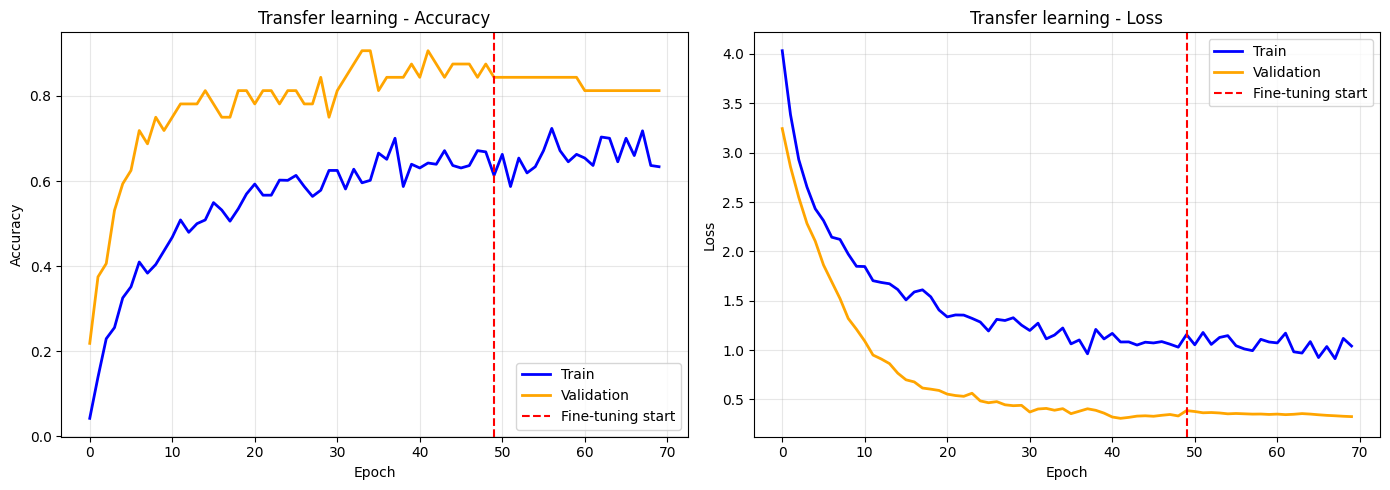

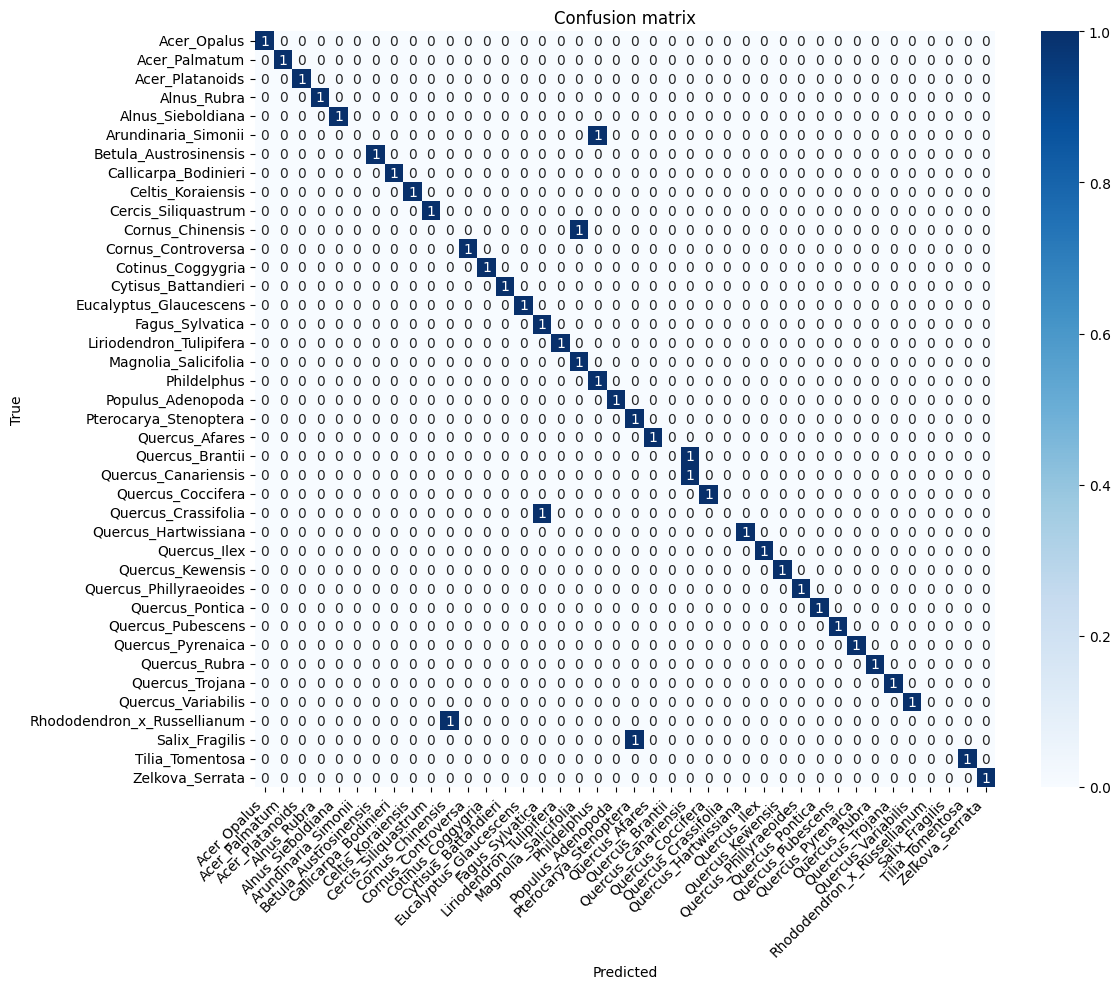

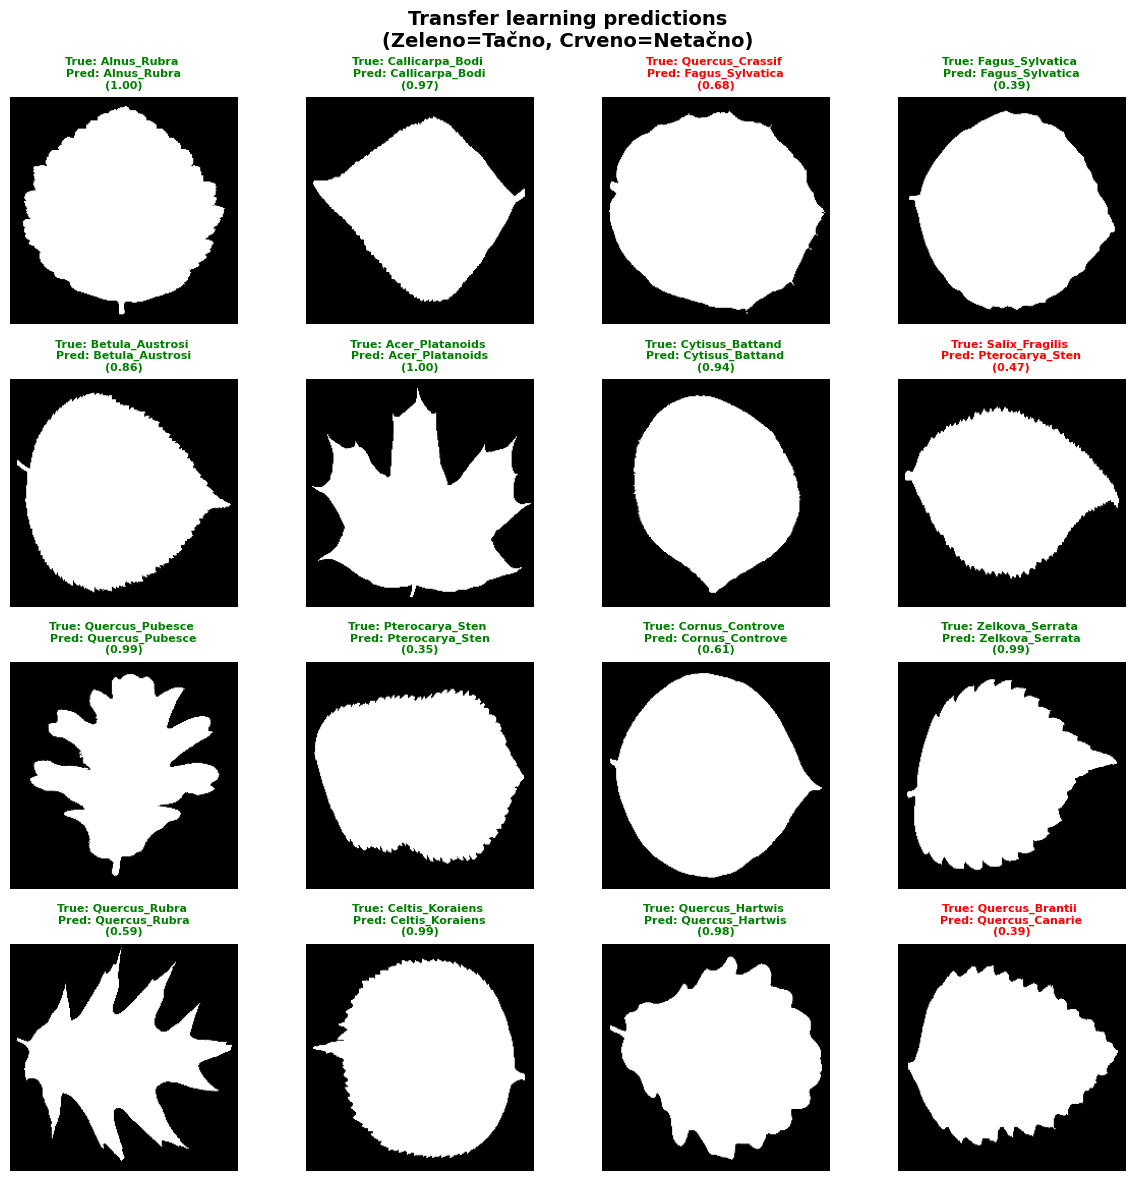

In [11]:
fig, axes = plt.subplots(1,2, figsize=(14,5))

all_train_acc = history_phase1.history['accuracy'] + history_phase2.history['accuracy']
all_val_acc = history_phase1.history['val_accuracy'] + history_phase2.history['val_accuracy']

axes[0].plot(all_train_acc, label='Train', linewidth=2, color='blue')
axes[0].plot(all_val_acc, label='Validation', linewidth=2, color='orange')
axes[0].axvline(x=len(history_phase1.history['accuracy']), color='red',
                linestyle='--', label='Fine-tuning start')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].set_title('Transfer learning - Accuracy')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

all_train_loss = history_phase1.history['loss'] + history_phase2.history['loss']
all_val_loss = history_phase1.history['val_loss'] + history_phase2.history['val_loss']

axes[1].plot(all_train_loss, label='Train', linewidth=2, color='blue')
axes[1].plot(all_val_loss, label='Validation', linewidth=2, color='orange')
axes[1].axvline(x=len(history_phase1.history['loss']), color='red',
                linestyle='--', label='Fine-tuning start')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].set_title('Transfer learning - Loss')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

cm = confusion_matrix(val_labels, val_pred_classes)
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=[label_to_species[i] for i in range(num_classes)],
            yticklabels=[label_to_species[i] for i in range(num_classes)])
plt.title('Confusion matrix')
plt.ylabel('True')
plt.xlabel('Predicted')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


fig, axes = plt.subplots(4, 4, figsize=(12, 12))
axes = axes.ravel()

for i in range(16):
  if i < len(val_images):
    idx = i
    img = val_images[idx]
    true_label = label_to_species[val_labels[idx]]
    pred_label = label_to_species[val_pred_classes[idx]]
    confidence = val_predictions[idx][val_pred_classes[idx]]

    img_display = img.copy()
    img_display = img_display + [103.939, 116.779, 123.68]
    img_display = np.clip(img_display, 0, 255).astype('uint8')

    axes[i].imshow(cv2.cvtColor(img_display, cv2.COLOR_RGB2GRAY), cmap='gray')
    axes[i].axis('off')

    color = 'green' if true_label == pred_label else 'red'
    axes[i].set_title(f'True: {true_label[:15]} \nPred: {pred_label[:15]}\n({confidence:.2f})',
                      fontsize=8, color=color, fontweight='bold')


plt.suptitle('Transfer learning predictions\n(Zeleno=Tačno, Crveno=Netačno)',
         fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


**6.11. Predikcija na test setu i submission**

Ova oblast obuhvata učitavanje test slika i generisanje predikcija. Poslednji korak predstavlja kreiranje fajla submission.csv

In [12]:
test_df['image_path'] = test_df['id'].apply(lambda x: os.path.join(IMAGE_DIR, f"{x}.jpg"))

test_images = []
test_ids = []

for _, row in test_df.iterrows():
  try:
    img = load_and_preprocess_image(row['image_path'])
    img = tf.keras.applications.efficientnet.preprocess_input(img)
    test_images.append(img)
    test_ids.append(row['id'])
  except:
    continue

test_images = np.array(test_images)

test_predictions = model.predict(test_images, batch_size=BATCH_SIZE, verbose = 1)
test_pred_classes = np.argmax(test_predictions, axis=1)
test_pred_species = [label_to_species[i] for i in test_pred_classes]

submission = pd.DataFrame({
    'id': test_ids,
    'species': test_pred_species
})

submission.to_csv('submission_transfer.csv', index=False)

38/38 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step



---
# **Zaključak**

Cilj projekta bio je automatska klasifikacija slika listova u odgovarajuće vrste drveća. Dataset je sadržao 990 slika silueta listova podjeljenih u 99 različitih vrsta, pri čemu je svaka vrsta imala samo 10 slika - što je predstavljalo problem zbog izuzetno malog broja podataka po klasi.


**Konačni rezultat klasifikacije**

Korišćenjem TransferLearning pristupa sa EfficientNetB0 modelom, postignuta je klasifikacija sa sledećim performansama:



*   **Validation accuracy:** 92.50% za 40 vrsta drveća
*   **Top-3 accuracy:** 100% (tačna vrsta je uvijek u top 3 kandidata)

Sistem je u stanju da sa visokom pouzdanošću prepozna vrstu listova na osnovu njegove siluete, što omogućava brzu i preciznu identifikaciju u realnim uslovima.






---
# **8. Literatura**



1.   Tan, M., & Le, Q. V. (2019). "EfficientNet: Rethinking Model Scaling for Convolutional Neural Networks." Proceedings of the 36th International Conference on Machine Learning (ICML), 6105-6114.
2.   Pan, S. J., & Yang, Q. (2010). "A Survey on Transfer Learning." IEEE Transactions on Knowledge and Data Engineering, 22(10), 1345-1359.
3.   Deng, J., Dong, W., Socher, R., Li, L. J., Li, K., & Fei-Fei, L. (2009). "ImageNet: A Large-Scale Hierarchical Image Database." IEEE Conference on Computer Vision and Pattern Recognition (CVPR), 248-255.
4.   Shorten, C., & Khoshgoftaar, T. M. (2019). "A survey on Image Data Augmentation for Deep Learning." Journal of Big Data, 6(1), 1-48.
5.   Yosinski, J., Clune, J., Bengio, Y., & Lipson, H. (2014). "How transferable are features in deep neural networks?" Advances in Neural Information Processing Systems (NeurIPS), 27, 3320-3328.
6.   TensorFlow Documentation. "Transfer Learning and Fine


